In [1]:
# neural network coursework

from math import e, tanh, sqrt
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from neural_net import *

## Importing Data

In [2]:
#note that the data has already been normalised
def import_and_split(path='CWData.csv', ratio=0.2) -> list[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    df = pd.read_csv(path)
    print(df)

    X = df.loc[:, df.columns != 'Index flood']
    y = df['Index flood']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Normalize X
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train)
    X_test_scaled = x_scaler.transform(X_test)

    # Normalize y
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled


data=import_and_split()


        AREA  BFIHOST   FARL   FPEXT    LDP  PROPWET  RMED-1D  SAAR  \
0      31.40    0.514  0.998  0.0480  14.18     0.40     35.2   922   
1     130.10    0.653  0.985  0.1461  30.25     0.28     27.5   596   
2     344.36    0.461  0.909  0.0258  42.68     0.41     38.5  1170   
3     710.96    0.458  0.995  0.1129  61.41     0.57     36.4  1153   
4      67.25    0.360  0.961  0.1069  22.87     0.35     36.3   820   
..       ...      ...    ...     ...    ...      ...      ...   ...   
518     7.17    0.398  1.000  0.0059   4.60     0.50     37.1  1150   
519   141.90    0.572  0.998  0.0451  35.42     0.36     37.9   887   
520    63.71    0.485  0.997  0.0494  19.83     0.63     48.9  1489   
521  1092.13    0.478  0.984  0.0610  90.61     0.59     49.8  1534   
522   181.88    0.435  0.898  0.0537  46.15     0.66     52.3  1756   

     Index flood  
0         9.5810  
1         3.8150  
2        80.6710  
3       200.8490  
4        19.9025  
..           ...  
518       7.62

## Establishing the matrices

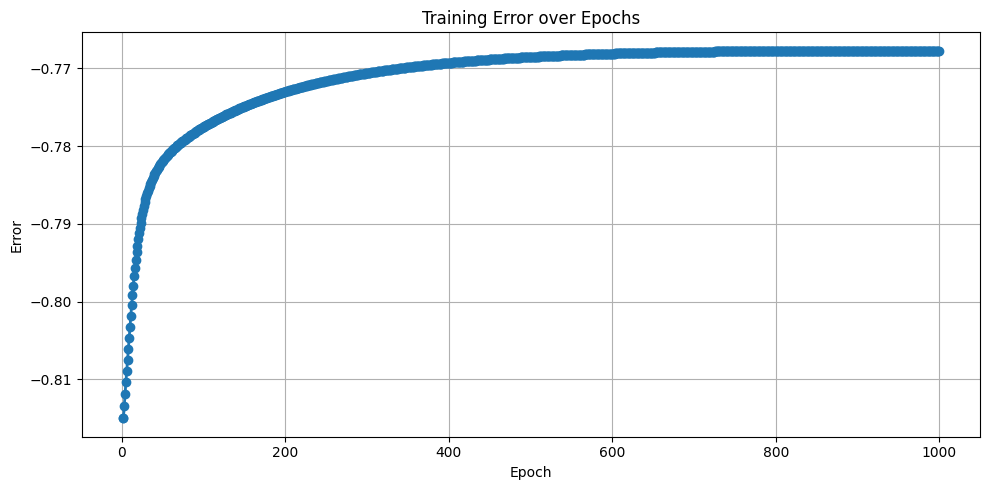

In [3]:
def abs_error(y_target,y_pred)->float:
    error_arr=y_target-y_pred

    return error_arr

#learning parameter
lp = 0.1


activation="tan"

epochs=1000

momentum= 0

hidden_biases = np.random.rand(1,8)
hidden_biases_grad= np.zeros((8,8))
output_bias = random.randint(1,100)


# doing random 
hidden_weight= np.random.rand(8,8)
hidden_weight_grad=np.zeros((8,8))
output_weight = random.randint(1,100)




def plot_error_over_epochs(errors):
    epochs = np.arange(1, len(errors) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, errors, marker='o', linestyle='-', linewidth=2)
    plt.title('Training Error over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def inference(x_test,y_test, weights):
    pass


def proper_back_prop(X_train, y_train, hidden_weight,hidden_weight_grad ,epochs,lp=0.1):

    def activation(sig):
        #print(sig)
        value = (1) / (1 + (e ** (sig*-1)))
        #print(value)
        return value

    def diff(node):
        value = (node) * (1 - (node))
        return value
    
    error_array=[]
    for epoch in range(epochs):

        #input layer
        sum = np.matmul(hidden_weight, X_train.T)
        derivatve = activation(sum)
        weight_sum= np.matmul(hidden_weight,derivatve)

        output= activation(weight_sum)

        error= y_train-output

        #backward pass

        output_diff = output

        delta_output = error * output_diff

        hidden_diff = diff(delta_output)

        delta_hidden = np.matmul(hidden_weight,hidden_diff)
        
        hidden_weight_grad = np.dot(delta_hidden, X_train) / X_train.shape[0]  # shape: (8, input_dim)

        hidden_weight += lp * hidden_weight_grad

        # records the error
        error_array.append((np.mean(error)))

    
    return error_array


X_train, X_test, y_train, y_test = data
errors= proper_back_prop(X_train, y_train, hidden_weight,hidden_weight_grad,epochs)

plot_error_over_epochs(errors)

In [4]:
if __name__ == "__main__":
    # Initialize utilities
    data_utils = DataUtils()
    plotter = PlottingUtils()
    
    # Load and prepare data
    print("Loading and preprocessing data...")
    X_train, X_test, y_train, y_test = data_utils.import_and_split('CWData.csv')
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    
    # Create neural network
    # Architecture: input_size -> 8 hidden -> 1 output
    input_size = X_train.shape[1]
    network = NeuralNetwork(
        layer_sizes=[input_size, 8, 1],
        activations=['sigmoid', 'sigmoid'],
        learning_rate=0.1
    )
    
    print(f"Created network with architecture: {network.layer_sizes}")
    
    # TODO: Train the network once you implement the missing methods
    # print("Training network...")
    # errors = network.train(X_train, y_train, epochs=1000)
    
    # TODO: Plot training progress
    # plotter.plot_error_over_epochs(errors)
    
    # TODO: Evaluate on test set
    # results = network.evaluate(X_test, y_test)
    # print(f"Test MAE: {results['mae']:.4f}")
    # print(f"Test RMSE: {results['rmse']:.4f}")
    
    # TODO: Plot predictions vs actual
    # plotter.plot_predictions_vs_actual(y_test, results['predictions'])
    
    print("Network structure created! Implement the TODO methods to complete.")


# ======================== IMPLEMENTATION GUIDE ========================

# TODO LIST (in suggested order):
# 1. Layer.forward() - Forward pass through a single layer
# 2. Layer.backward() - Backward pass through a single layer  
# 3. NeuralNetwork.forward() - Forward pass through entire network
# 4. NeuralNetwork.backward() - Backward pass through entire network
# 5. NeuralNetwork.train() - Training loop
# 6. NeuralNetwork.predict() - Make predictions

# TESTING TIPS:
# - Start with simple test cases (small datasets, few epochs)
# - Print shapes frequently to debug dimension issues
# - Test each layer individually before combining
# - Compare results with your original implementation

Loading and preprocessing data...
Loaded data shape: (523, 9)
Training set shape: (418, 8)
Test set shape: (105, 8)
Created network with architecture: [8, 8, 1]
Network structure created! Implement the TODO methods to complete.
